# Histogramas

In [1]:
from collections import Counter

import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set()

## Loading data

In [4]:
with open('data/out/cleaned_tomo_1.txt') as f:
    text1 = f.read()

with open('data/out/cleaned_tomo_5a.txt') as f:
    text5a = f.read()

with open('data/out/cleaned_tomo_5b.txt') as f:
    text5b = f.read()

with open('data/out/cleaned_tomo_7.txt') as f:
    text7 = f.read()

## Processing data

In [5]:
counter1 = Counter(text1.split())
counter5a = Counter(text5a.split())
counter5b = Counter(text5b.split())
counter7 = Counter(text7.split())

In [6]:
N = 5

In [7]:
kws1 = [k for k, v in counter1.most_common(N)]
kws5a = [k for k, v in counter5a.most_common(N)]
kws5b = [k for k, v in counter5b.most_common(N)]
kws7 = [k for k, v in counter7.most_common(N)]

In [8]:
kws = set(kws1 + kws5a + kws5b + kws7)

In [9]:
kws

{'acuerdo',
 'conflicto',
 'farc-ep',
 'gobierno',
 'mesa',
 'mujeres',
 'nacional',
 'participación',
 'paz',
 'víctimas'}

In [10]:
df = pd.DataFrame({
    'Tomo 1': pd.Series([counter1[k] for k in kws], index=kws),
    'Tomo 5A': pd.Series([counter5a[k] for k in kws], index=kws),
    'Tomo 5B': pd.Series([counter5b[k] for k in kws], index=kws),
    'Tomo 7': pd.Series([counter7[k] for k in kws], index=kws),
}).sort_index()

In [11]:
df

,Tomo 1,Tomo 5A,Tomo 5B,Tomo 7
acuerdo,265,237,485,368
conflicto,254,602,776,305
farc-ep,387,400,567,218
gobierno,400,367,576,338
mesa,100,309,275,510
mujeres,13,123,58,854
nacional,156,277,299,681
participación,82,140,111,602
paz,390,687,1056,1026
víctimas,133,931,732,359


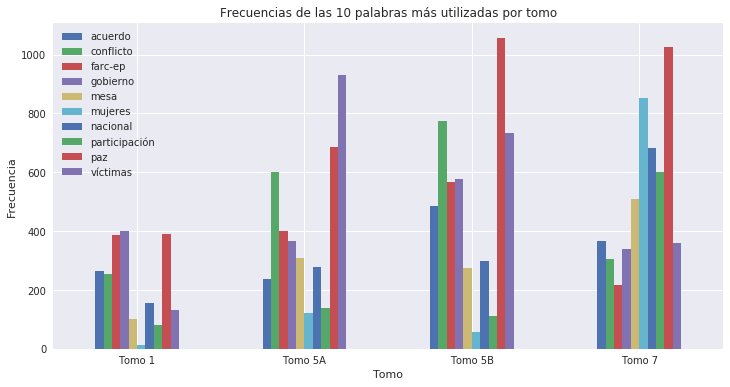

In [12]:
ax = df.T.plot(
    figsize=(12, 6),
    kind='bar',
    title='Frecuencias de las 10 palabras más utilizadas por tomo',
    rot=0,
)
ax.set_xlabel('Tomo')
ax.set_ylabel('Frecuencia');